#Modelo de Simulação para a disponibilidade sistema novo


Resultados da Simulação:
Tempo Total Operacional: 75 unidades de tempo
Tempo Total Inativo: 24 unidades de tempo
Número de Falhas: 8
Taxa de Falhas: 10.67%
Porcentagem de Disponibilidade: 75.76%


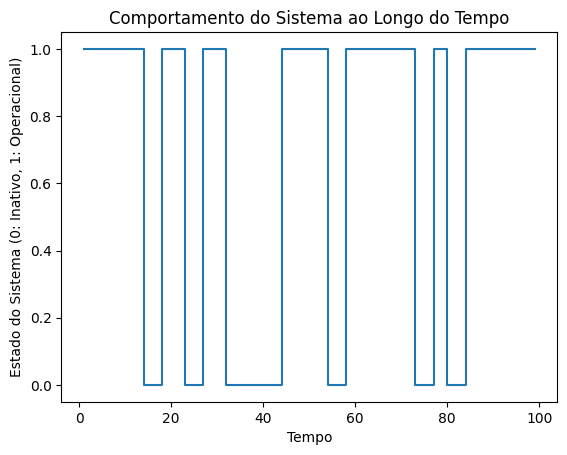

In [ ]:
import simpy
import random
import matplotlib.pyplot as plt

class Sistema:
    def __init__(self, env, tempo_disponibilidade):
        self.env = env
        self.tempo_disponibilidade = tempo_disponibilidade
        self.processo = env.process(self.funcionamento())
        self.tempo_total_operacional = 0
        self.tempo_total_inativo = 0
        self.num_falhas = 0
        self.tempo_atual = []
        self.estado_atual = []

    def funcionamento(self):
        while True:
            # Simula a operação normal do sistema
            yield self.env.timeout(1)
            self.tempo_atual.append(self.env.now)
            self.estado_atual.append(1)  # 1 indica operacional
            self.tempo_total_operacional += 1

            # Simula uma possível falha
            if random.random() < 0.1:  # 10% de chance de falha
                self.num_falhas += 1
                self.estado_atual[-1] = 0  # 0 indica inativo
                yield self.env.timeout(3)  # Tempo de inatividade
                self.tempo_total_inativo += 3

    def executar_simulacao(self, duracao_simulacao):
        self.env.run(until=duracao_simulacao)

    def calcular_porcentagem_disponibilidade(self):
        tempo_total_simulacao = self.tempo_total_operacional + self.tempo_total_inativo
        porcentagem_disponibilidade = self.tempo_total_operacional / tempo_total_simulacao
        return porcentagem_disponibilidade

# Configuração da simulação
tempo_disponibilidade = 0.9  # 90% de tempo disponível
duracao_simulacao = 100

env = simpy.Environment()
sistema = Sistema(env, tempo_disponibilidade)
sistema.executar_simulacao(duracao_simulacao)

# Resultados da simulação
print("\nResultados da Simulação:")
print(f"Tempo Total Operacional: {sistema.tempo_total_operacional} unidades de tempo")
print(f"Tempo Total Inativo: {sistema.tempo_total_inativo} unidades de tempo")
print(f"Número de Falhas: {sistema.num_falhas}")

# Calcular a taxa de falhas
taxa_falhas = sistema.num_falhas / sistema.tempo_total_operacional
print(f"Taxa de Falhas: {taxa_falhas:.2%}")

# Calcular a porcentagem de disponibilidade
porcentagem_disponibilidade = sistema.calcular_porcentagem_disponibilidade()
print(f"Porcentagem de Disponibilidade: {porcentagem_disponibilidade:.2%}")

# Criar um gráfico
plt.step(sistema.tempo_atual, sistema.estado_atual, where='post')
plt.title('Comportamento do Sistema ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Estado do Sistema (0: Inativo, 1: Operacional)')
plt.show()
